Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [94]:
NAME = "Fisayo Mojeed"

## Assignment 1 - Data Cleaning & Exploration
**(30 points total)**

For this assignment, we will use an open dataset with data on various types of cereal and the corresponding customer ratings. Use the .csv file provided.

Create a dataframe by importing the file into Jupyter, and complete the tasks below. Be sure to show your Python code. You will not be graded on code efficiency, but your code should return a correct answer.

**Question 1.**  _(4 points)_
* Create a new 'Type of Cereal' column in your dataframe (1 point) by copying the 'name' column. Write a function to replace the names of the cereal in your new column with one of these categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other (3 points). Hint: the function should look through the text in the cereal name and determine, based on its contents, how to categorize the cereal type.

**Question 2.**  _(2 points)_
* Identify the negative values in the data set and replace them with the median value for that column. 

**Question 3.** _(5 points)_
* Standardize the 'weight' column to 1. For this question, you will need to write a function to divide the remaining columns which contain nutritional information by the corresponding value in the weight column, and you will need to divide the value in the weight column by itself in order to get 1. For example, if an observation has a weight value of 1.33 and a calories value of 250, if you divide 250/1.33 you should get a calories value of 188 and a weight value of 1. 

**Question 4.**  _(5 points)_
* Create a new column to categorize cereals as 'healthy' vs. 'unhealthy'. You can define your own version of healthy vs. unhealthy, or you can use the following: healthy cereals can be defined as those which have low calories (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2). All other cereals are unhealthy.

**Question 5.** _(2 points)_
* Based on your newly prepared data set, identify what % of cereals that each manufacturer produces are healthy.

**Question 6.** _(2 points)_
* Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.

**Question 7.** _(2 points)_
* Calculate the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.

**Question 8.** _(3 points)_
* Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.

**Question 9.** _(3 points)_
* Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy. 

**Question 10.** _(1 point)_
* Which shelf has the most healthy cereals?

**Question 11.** _(1 point)_
* Based on the analysis conducted, what can you conclude about the cereal data set?

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [96]:
df = pd.read_csv('cereal 2.csv')

In [97]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [98]:
df['Type of Cereal'] = df['name']


In [99]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,100% Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,100% Natural Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,All-Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,All-Bran with Extra Fiber
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Almond Delight


In [100]:
def categorize_cereal(name):
    name_lower = name.lower()
    if 'bran' in name_lower:
        return 'Bran'
    elif 'wheat' in name_lower:
        return 'Wheat'
    elif 'fiber' in name_lower:
        return 'Fiber'
    elif 'protein' in name_lower or 'crunch' in name_lower:
        return 'Protein Crunch'
    elif 'corn' in name_lower:
        return 'Corn'
    elif 'nut' in name_lower:
        return 'Nut'
    elif 'rice' in name_lower:
        return 'Rice'
    else:
        return 'Other'

In [101]:
 df['Type of Cereal'] = df['Type of Cereal'].apply(categorize_cereal) 

In [102]:
print(df)

                         name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
1           100% Natural Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       110        2    1     200    1.0   

    carbo  sugars  potass  

In [103]:
df.loc[df['potass'] < 0, 'potass'] = np.nan
df['potass'] = df['potass'].fillna(df['potass'].median())
print(df)

                         name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
1           100% Natural Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       110        2    1     200    1.0   

    carbo  sugars  potass  

In [104]:
# Define the criteria for healthy cereals
healthy_criteria = (df['calories'] < 100) & (df['sodium'] < 150) & (df['sugars'] < 9) & (df['fiber'] > 3) & (df['protein'] > 2)


In [105]:
# Create a new column 'Categorization' and set values based on the criteria
df['Categorization'] = 'Unhealthy'
df.loc[healthy_criteria, 'Categorization'] = 'Healthy'

In [106]:
print(df)

                         name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
1           100% Natural Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       110        2    1     200    1.0   

    carbo  sugars  potass  

In [107]:
# Count the total number of cereals produced by each manufacturer
manufacturer_counts = df['mfr'].value_counts()

In [108]:
# Count the number of healthy cereals produced by each manufacturer
healthy_counts = df[df['Categorization'] == 'Healthy']['mfr'].value_counts()


In [109]:
result_df = pd.DataFrame({
    'Manufacturer': manufacturer_counts.index,
    'Total Cereals': manufacturer_counts.values,
    'Healthy Cereals': healthy_counts.reindex(manufacturer_counts.index, fill_value=0).values
})

In [110]:
# Calculate the percentage of healthy cereals for each manufacturer
result_df['Percentage Healthy'] = (result_df['Healthy Cereals'] / result_df['Total Cereals']) * 100


In [111]:
print(result_df)

  Manufacturer  Total Cereals  Healthy Cereals  Percentage Healthy
0            K             23                1            4.347826
1            G             22                0            0.000000
2            P              9                0            0.000000
3            Q              8                0            0.000000
4            R              8                0            0.000000
5            N              6                2           33.333333
6            A              1                0            0.000000


In [112]:
# Separate the DataFrame into healthy and unhealthy cereals
healthy_cereals = df[df['Categorization'] == 'Healthy']
unhealthy_cereals = df[df['Categorization'] == 'Unhealthy']

In [113]:
# Calculate average, minimum, and maximum ratings for healthy cereals
avg_rating_healthy = healthy_cereals['rating'].mean()
min_rating_healthy = healthy_cereals['rating'].min()
max_rating_healthy = healthy_cereals['rating'].max()

In [114]:
# Calculate average, minimum, and maximum ratings for unhealthy cereals
avg_rating_unhealthy = unhealthy_cereals['rating'].mean()
min_rating_unhealthy = unhealthy_cereals['rating'].min()
max_rating_unhealthy = unhealthy_cereals['rating'].max()

In [115]:
# Display the results
print("Healthy Cereals:")
print("Average Rating:", avg_rating_healthy)
print("Minimum Rating:", min_rating_healthy)
print("Maximum Rating:", max_rating_healthy)
print("\nUnhealthy Cereals:")
print("Average Rating:", avg_rating_unhealthy)
print("Minimum Rating:", min_rating_unhealthy)
print("Maximum Rating:", max_rating_unhealthy)

Healthy Cereals:
Average Rating: 78.86027800000001
Minimum Rating: 68.402973
Maximum Rating: 93.704912

Unhealthy Cereals:
Average Rating: 41.19835743243243
Minimum Rating: 18.042851
Maximum Rating: 72.801787


In [116]:
# Define the types of cereal
cereal_types = ['Bran', 'Wheat', 'Fiber', 'Protein', 'Crunch', 'Corn', 'Nut', 'Rice', 'Other']

In [117]:
# Create an empty list to store dictionaries
result_data = []

In [118]:
# Calculate average, minimum, and maximum ratings for each type of cereal
for cereal_type in cereal_types:
    subset_df = df[df['Type of Cereal'] == cereal_type]
    
    avg_rating = subset_df['rating'].mean()
    min_rating = subset_df['rating'].min()
    max_rating = subset_df['rating'].max()
    
    result_data.append({
        'Cereal Type': cereal_type,
        'Average Rating': avg_rating,
        'Minimum Rating': min_rating,
        'Maximum Rating': max_rating
    })

In [119]:
# Create a DataFrame from the list of dictionaries
result_df = pd.DataFrame(result_data)

# Display the results
print(result_df)

  Cereal Type  Average Rating  Minimum Rating  Maximum Rating
0        Bran       50.714179       28.592785       93.704912
1       Wheat       56.333863       36.176196       72.801787
2       Fiber             NaN             NaN             NaN
3     Protein             NaN             NaN             NaN
4      Crunch             NaN             NaN             NaN
5        Corn       40.482720       35.782791       45.863324
6         Nut       42.433500       31.072217       53.371007
7        Rice       47.771735       40.560159       60.756112
8       Other       37.281694       21.871292       55.333142


In [120]:
# Group by 'mfr' and 'Type of Cereal' and count the occurrences
grouped_df = df.groupby(['mfr', 'Type of Cereal']).size().unstack()

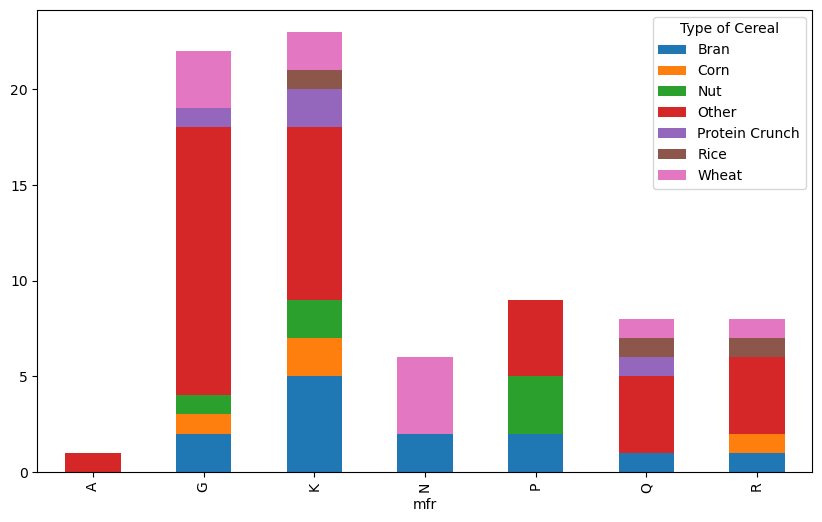

In [121]:
# Plot stacked bar chart
ax = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))

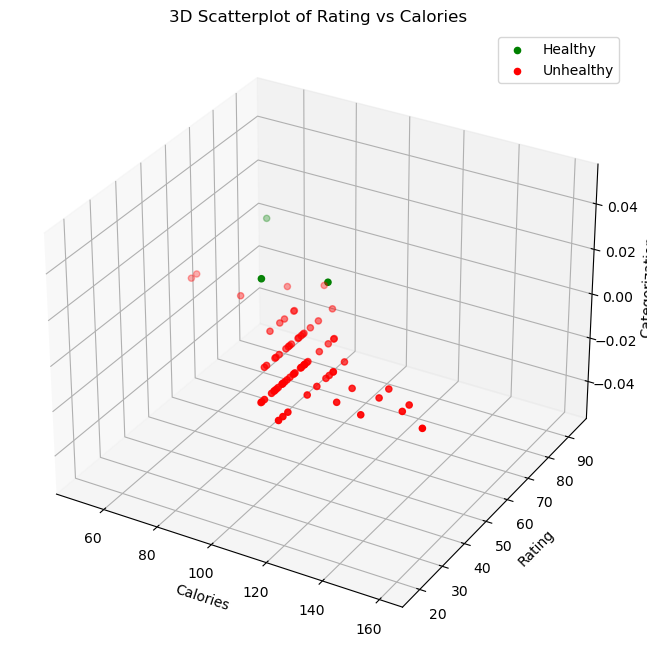

In [122]:
# Create a 3D scatterplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Scatterplot points for healthy cereals
ax.scatter(df[df['Categorization'] == 'Healthy']['calories'],
           df[df['Categorization'] == 'Healthy']['rating'],
           c='green', label='Healthy', marker='o')
# Scatterplot points for unhealthy cereals
ax.scatter(df[df['Categorization'] == 'Unhealthy']['calories'],
           df[df['Categorization'] == 'Unhealthy']['rating'],
           c='red', label='Unhealthy', marker='o')
# Set labels and title
ax.set_xlabel('Calories')
ax.set_ylabel('Rating')
ax.set_zlabel('Categorization')
ax.set_title('3D Scatterplot of Rating vs Calories')
# Show legend
ax.legend()

In [123]:
#Based on the analysis, the shelf 3- All Bran with Extra fiber is the most healthy cereals

In [124]:
# Based on the above analysis, we can conclude that Manufacture N produces the healthiest cereals. 
# It is also seen that the cereal with the highest ratings is noit necessarily the healthiest.